Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection
%matplotlib inline
plt.style.use('ggplot')

Reading CSV file

In [2]:
USvideos = pd.read_csv("USvideos.csv")
copy = pd.DataFrame.copy(USvideos)

USvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
data_dislikes = [copy['views'], copy['dislikes']]
df_dislikes = pd.DataFrame(data_dislikes) 

In [5]:
df_dislikes.head()

,0,1,2,3,4,5,6,7,8,9,...,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948
views,748374,2418783,3191434,343168,2095731,119180,2103417,817732,826059,256426,...,6004782,5564576,5534278,23502572,8259128,1685609,1064798,1066451,5660813,10306119
dislikes,2966,6146,5339,666,1989,511,2445,778,119,1363,...,4166,2295,1591,15993,4052,1385,382,1032,2846,212976


In [6]:
transpose_dislikes = pd.DataFrame.transpose(df_dislikes)

In [7]:
transpose_dislikes.head()

,views,dislikes
0,748374,2966
1,2418783,6146
2,3191434,5339
3,343168,666
4,2095731,1989


Text(0.5, 1.0, 'Views X Dislikes')

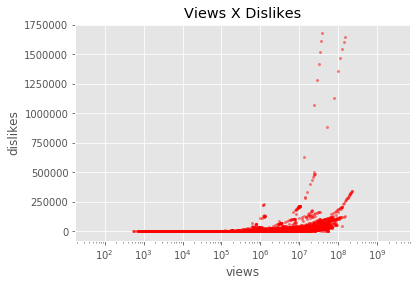

In [8]:
transpose_dislikes.plot(x = 'views', y = 'dislikes', kind = 'scatter', logx = True, color = 'red', alpha = 0.5, s=5)

plt.title('Views X Dislikes')

In [9]:
data_likes = [copy['views'], copy['likes']]
df_likes = pd.DataFrame(data_likes)

In [10]:
df_likes.head()

,0,1,2,3,4,5,6,7,8,9,...,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948
views,748374,2418783,3191434,343168,2095731,119180,2103417,817732,826059,256426,...,6004782,5564576,5534278,23502572,8259128,1685609,1064798,1066451,5660813,10306119
likes,57527,97185,146033,10172,132235,9763,15993,23663,3543,12654,...,210802,46351,45128,676467,645888,38160,60008,48068,192957,357079


In [11]:
transpose_likes = pd.DataFrame.transpose(df_likes)

In [12]:
transpose_likes.head()

,views,likes
0,748374,57527
1,2418783,97185
2,3191434,146033
3,343168,10172
4,2095731,132235


Text(0.5, 1.0, 'Views X Likes')

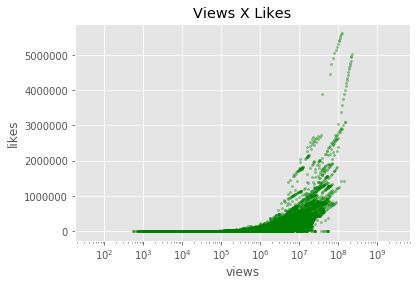

In [13]:
transpose_likes.plot(x = 'views', y = 'likes', kind = 'scatter', logx= True, color = 'green', alpha=0.4, s=5)
plt.title('Views X Likes')

In [14]:
data_commentaries = [copy['views'], copy['comment_count']]
df_commentaries = pd.DataFrame(data_commentaries)

In [15]:
df_commentaries.head()

,0,1,2,3,4,5,6,7,8,9,...,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948
views,748374,2418783,3191434,343168,2095731,119180,2103417,817732,826059,256426,...,6004782,5564576,5534278,23502572,8259128,1685609,1064798,1066451,5660813,10306119
comment_count,15954,12703,8181,2146,17518,1434,1970,3432,340,2368,...,15169,2861,806,52432,62610,2657,3936,3992,13088,144795


In [16]:
transpose_commentaries = pd.DataFrame.transpose(df_commentaries)

In [17]:
transpose_commentaries.head()

,views,comment_count
0,748374,15954
1,2418783,12703
2,3191434,8181
3,343168,2146
4,2095731,17518


Text(0.5, 1.0, 'Views X Commentaries')

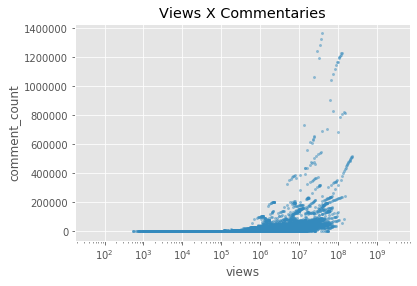

In [18]:
transpose_commentaries.plot(x = 'views', y = 'comment_count', kind = 'scatter', logx = True, alpha = 0.5, s=5)
plt.title('Views X Commentaries')

In [19]:
data_analysis = [copy['views'], copy['likes'], copy['dislikes']]
df_analysis = pd.DataFrame(data_analysis)
transpose_analysis = pd.DataFrame.transpose(df_analysis)
transpose_analysis.head()

,views,likes,dislikes
0,748374,57527,2966
1,2418783,97185,6146
2,3191434,146033,5339
3,343168,10172,666
4,2095731,132235,1989


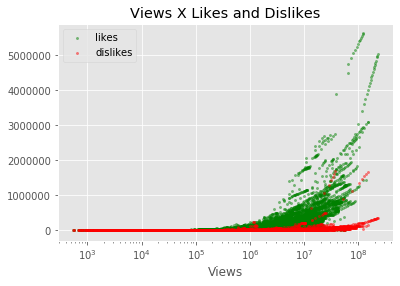

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(transpose_analysis.views, transpose_analysis.likes, c = 'g', label = 'likes', alpha = 0.5, s=5)
ax1.scatter(transpose_analysis.views, transpose_analysis.dislikes, c = 'r', label = 'dislikes', alpha = 0.5, s=5)
ax1.set_xscale('log')
ax1.legend()

plt.xlabel('Views')
plt.title('Views X Likes and Dislikes')
plt.show()

In [21]:
USvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [22]:
copy_data = pd.DataFrame.copy(USvideos)

In [23]:
dict_tags = {}

In [24]:
data_tags = copy_data[copy_data['tags'] != '[none]']['tags']

for i in range(data_tags.size):
    tags = data_tags.iloc[i].split("|")
    for tag in tags:
        if tag in dict_tags:
            dict_tags[tag] += 1
        else:
            dict_tags[tag] = 1

tag_series = pd.Series(dict_tags)
#tag_series.sort_values(ascending=False)

Text(0, 0.5, 'Times appeared')

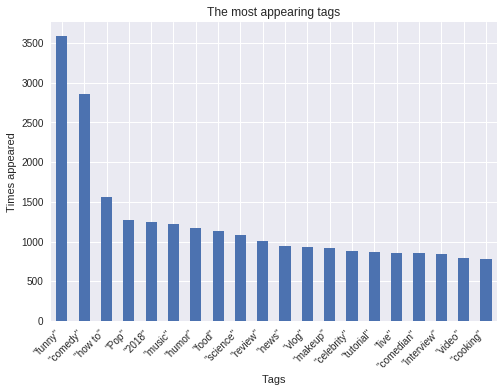

In [45]:
plt.style.use('seaborn')

tag_series.sort_values(ascending=False).iloc[:20].plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title("The most appearing tags")
plt.xlabel('Tags')
plt.ylabel('Times appeared')

In [26]:
import json

In [27]:
map_id_category = {}
with open('US_category_id.json') as file:
    json_data = json.load(file)
    for item in json_data['items']:
        map_id_category[int(item['id'])] = item['snippet']['title']
print(map_id_category)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [28]:
copy_data['category_id'] = copy_data['category_id'].map(map_id_category)
copy_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [34]:
dict_category = {}
for item in copy_data['category_id']:
    if item not in dict_category:
        dict_category[item] = 1
    else:
        dict_category[item] += 1
        
series_category = pd.Series(dict_category).sort_values(ascending = False)
print(series_category)

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
dtype: int64


Text(0, 0.5, 'Appearences')

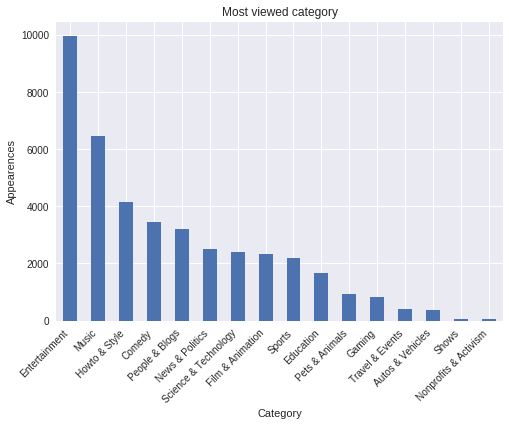

In [46]:
series_category.iloc[:20].plot(kind='bar')
plt.title('Most appeared category')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Category')
plt.ylabel('Appearences')

Text(0, 0.5, 'Views')

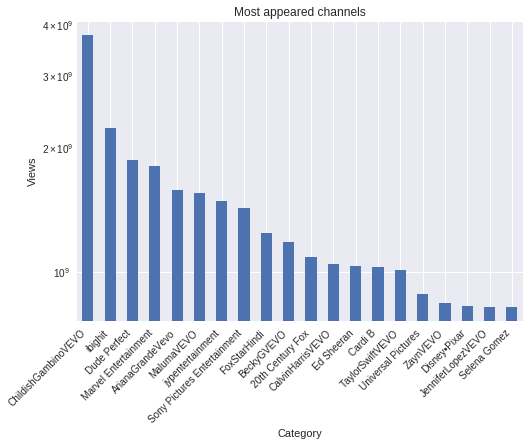

In [47]:
copy_data.groupby('channel_title').sum()['views'].sort_values(ascending = False).iloc[0:20].plot(kind = 'bar', logy = True)
plt.title('Most appeared channels')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Category')
plt.ylabel('Views')

Text(0.5, 1.0, 'Percentage of disabled comments')

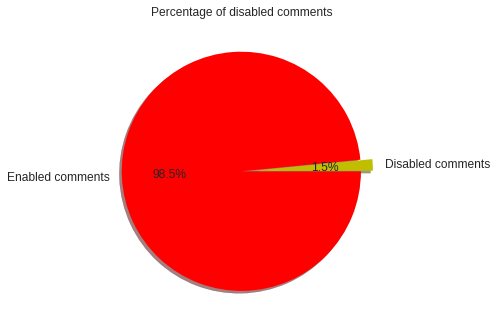

In [72]:
quantity_disabled_comments = copy_data['comments_disabled'].sum()
inverted_comment_column = copy_data['comments_disabled'].apply(lambda x: not x).sum()
labels = 'Disabled comments', 'Enabled comments'
total = quantity_disabled_comments+inverted_comment_column
plt.pie([quantity_disabled_comments, inverted_comment_column], colors = ['y', 'r'], shadow = True,
       explode = [0.1, 0], autopct='%1.1f%%', textprops={'size': 'larger'}, labels = labels)
plt.title('Percentage of disabled comments')

Text(0.5, 1.0, 'Percentage of disabled ratings')

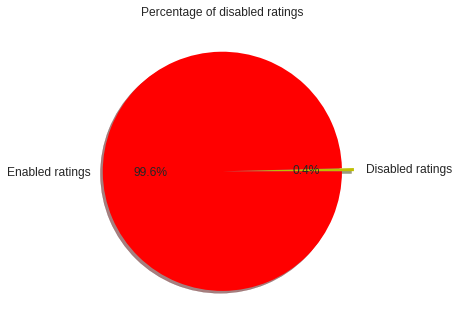

In [73]:
quantity_disabled_ratings = copy_data['ratings_disabled'].sum()
inverted_ratings_column = copy_data['ratings_disabled'].apply(lambda x: not x).sum()
labels = 'Disabled ratings', 'Enabled ratings'
total = quantity_disabled_ratings+inverted_ratings_column
plt.pie([quantity_disabled_ratings, inverted_ratings_column], colors = ['y', 'r'], shadow = True,
       explode = [0.1, 0], autopct='%1.1f%%', textprops={'size': 'larger'}, labels = labels)
plt.title('Percentage of disabled ratings')